<a href="https://colab.research.google.com/github/nouha18/pythoncheckpoint/blob/update/Linear_Regression_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pand
import numpy as np

dataframe= pand.read_csv('./housedata.csv')
dataframe


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
dataframe.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**id** :a notation for a house

**date:** Date house was sold

**price:** Price is prediction target

**bedrooms:** Number of Bedrooms/House

**bathrooms:** Number of bathrooms/bedrooms

**sqft_living:** square footage of the home

**sqft_lot:** square footage of the lot

**floors :**Total floors (levels) in house

**waterfront :**House which has a view to a waterfront

**view:** Has been viewed

**condition :**How good the condition is Overall

**grade:** overall grade given to the housing unit, based on King County grading system

**sqft_above :**square footage of house apart from basement

**sqft_basement:** square footage of the basement

**yr_built :**Built Year

**yr_renovated :**Year when house was renovated

**zipcode:**zip code

lat: Latitude coordinate

**long:** Longitude coordinate

**sqft_living15 :**Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15 :**lotSize area in 2015(implies-- some renovations)**texte en gras**

In [ ]:
dataframe.sum().isnull()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

**Notes:** In this phase "preprocessing data" we notice that the dataset is already clean, no missing data and well organised so we should move to next step which is data visualisation and analysation.

In [ ]:
import matplotlib.pyplot as plt
print("visualisation of dataframes details")
dataframe.columns

visualisation of dataframes details


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

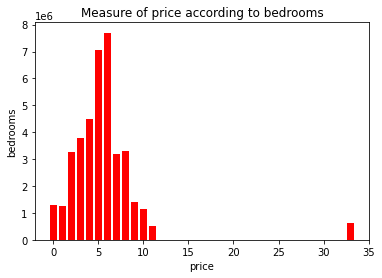

In [ ]:
plt.ylabel('bedrooms')
plt.xlabel('price')
plt.title('Measure of price according to bedrooms')
arr1=np.array(dataframe['bedrooms'])
arr2=np.array(dataframe['price'])
plt.bar(arr1,arr2,color="red")
plt.show()

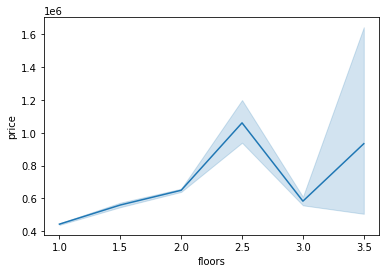

In [ ]:
import seaborn as sns
res = sns.lineplot(x="floors", y="price", data=dataframe)
plt.show()

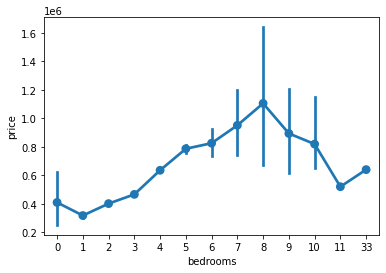

In [ ]:
import seaborn as sns
res = sns.pointplot(x=dataframe["bedrooms"], y=dataframe["price"], data=dataframe)
plt.show()

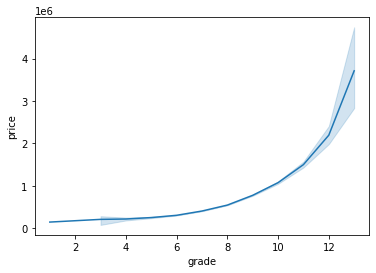

In [ ]:
res = sns.lineplot(x=dataframe["grade"], y=dataframe["price"], data=dataframe.head(100))
plt.show()
##ax2+bx+c

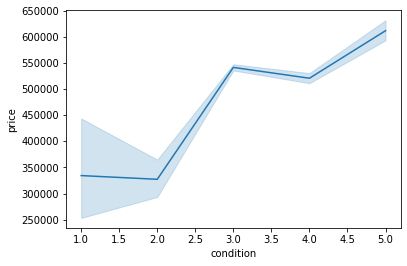

In [ ]:
res = sns.lineplot(x=dataframe["condition"], y=dataframe["price"], data=dataframe.head(100))
plt.show()

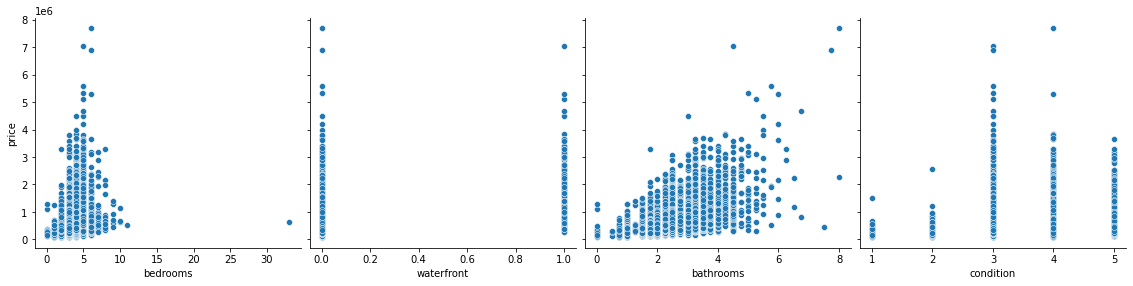

In [ ]:

sns.pairplot(dataframe, x_vars=['bedrooms', 'waterfront', 'bathrooms','condition'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

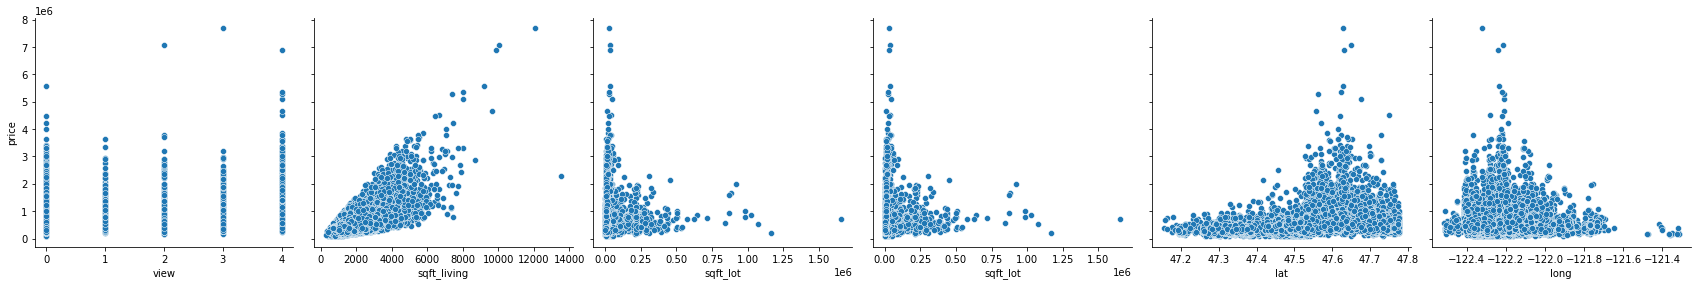

In [ ]:
sns.pairplot(dataframe, x_vars=['view', 'sqft_living', 'sqft_lot','sqft_lot','lat','long'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

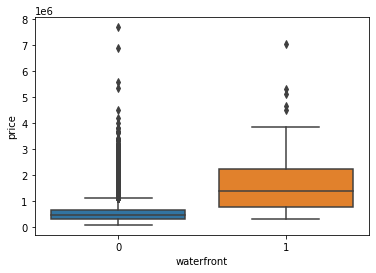

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="waterfront", y="price", data=dataframe)

Note :⚓ We note that the price of the house located near a river or beach is more expensive than the far one.  

(0.0, 8081250.0)

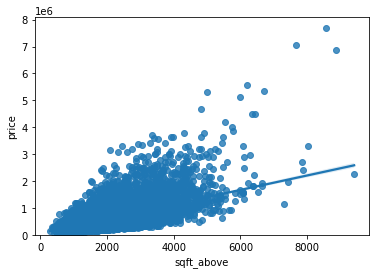

In [ ]:
import matplotlib.pyplot as plt
sns.regplot(x="sqft_above", y="price", data=dataframe)
plt.ylim(0,) 

**Description:**
 ▶ the function sqft is positively correlated with price

In [ ]:
dataframe.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

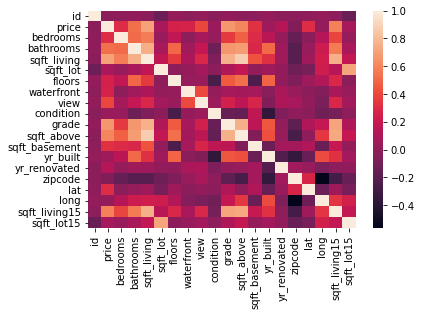

In [ ]:
sns.heatmap(dataframe.corr(), annot = False)
plt.show()

**Description ▶** the use of corr() function is for calculation the correlation of variables with the price


# Supervised Learning data # 

**Linear Regression :**  y = β0 + β1X + TV

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = dataframe[['long']]
Y = dataframe['price']
lms = LinearRegression()
lms
print(" we use long variable to calculate R^2")
lms.fit(X,Y)
lms.score(X, Y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lms.fit(x_train, y_train)
print('Intercept: ', lms.intercept_)
print('Coefficient:', lms.coef_)

 we use long variable to calculate R^2
Intercept:  -226087.68126121
Coefficient: [  19201.9382795   236990.05981074 1034765.56586108   56353.59790658]


In [ ]:
import matplotlib.pyplot as plt

lm = LinearRegression()
lm
X = dataframe[['bedrooms']]
Y = dataframe['price']

lm.fit(X,Y)

lm.score(X,Y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lm.fit(x_train, y_train)
print('Intercept: ', lm.intercept_)
print('Coefficient:', lm.coef_)

Intercept:  -226087.68126121
Coefficient: [  19201.9382795   236990.05981074 1034765.56586108   56353.59790658]


In [ ]:
y_data = dataframe['price']

x_data=dataframe.drop('price',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
print("xtrain",x_train)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train[['sqft_living']], y_train)
lre.score(x_test[['sqft_living']], y_test)


xtrain                id             date  ...  sqft_living15  sqft_lot15
17801  1931300850  20140527T000000  ...           1570        2640
20764  9536600810  20140708T000000  ...           1390        9152
2285   5470100270  20141209T000000  ...           1430        9664
13350  1644510040  20140528T000000  ...           3030        8643
19376  8079010220  20141117T000000  ...           2260        7274
...           ...              ...  ...            ...         ...
10955  3630110510  20140804T000000  ...           2190        3841
17289  6813600605  20150128T000000  ...           1360        5580
5192    224069145  20150401T000000  ...           2460       36677
12172   520700125  20140805T000000  ...           1550        9240
235    1762600320  20140610T000000  ...           3430       35096

[18371 rows x 20 columns]
number of test samples : 3242
number of training samples: 18371


0.4910058627910613

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
print("list of features",features)

list of features ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']


In [ ]:
lm = LinearRegression()
lm
X = dataframe[['floors']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)


0.06594310068341092

In [ ]:
lm = LinearRegression()
lm
X = dataframe[['lat']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)

0.09425113672917462

In [ ]:
lm = LinearRegression()
lm

X = dataframe[['bedrooms']]
Y = dataframe['price']

lm.fit(X,Y)
lm.score(X,Y)


0.09507947467657651

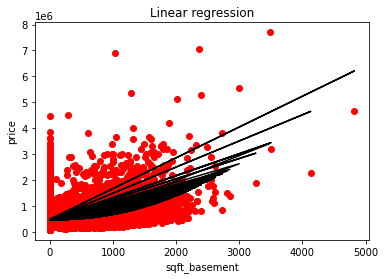

In [ ]:
lm = LinearRegression()
lm
X = dataframe[['sqft_basement']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)
x= dataframe["sqft_basement"].values.reshape(-1,1)
y= dataframe["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 
lg.fit(x_, y)
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_basement")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

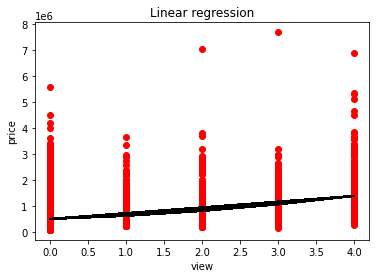

In [ ]:
lm = LinearRegression()
lm
X = dataframe[['view']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)

x= dataframe["view"].values.reshape(-1,1)
y= dataframe["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("view")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [ ]:
lm = LinearRegression()
lm

X = dataframe[['bathrooms']]
Y = dataframe['price']
print(lm.fit(X,Y))
print(lm.score(X,Y))
print('R squared value of the model: {:.2f}'.format(lm.score(X,Y)*100))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.27576939959239877
R squared value of the model: 27.58


In [ ]:
lm = LinearRegression()
lm
X = dataframe[['sqft_living15']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)
print('R squared value of the model: {:.2f}'.format(lm.score(X,Y)*100))
print('=> 34,27% fit the regression model')

R squared value of the model: 34.27
=> 34,27% fit the regression model


R squared value of the model: 40.08
40% of data fit the regression model


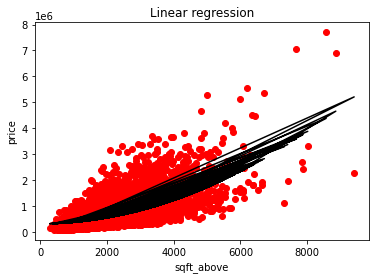

In [ ]:
lm = LinearRegression()
lm
X = dataframe[['sqft_above']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)

x= dataframe["sqft_above"].values.reshape(-1,1)
y= dataframe["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_above")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 
print('R squared value of the model: {:.2f}'.format(lg.score(x_poly,y)*100))
print("40% of data fit the regression model")

In [ ]:
lm = LinearRegression()
lm
X = dataframe[['grade']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)

0.4454684861092873

In [ ]:
lm = LinearRegression()
lm
X = dataframe[['sqft_living']]
Y = dataframe['price']
lm.fit(X,Y)
lm.score(X,Y)

0.49285321790379316

LR :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[ 365000.  865000. 1038000. ...  235000. 2890000.  275000.]


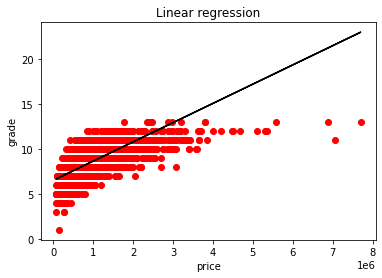

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
x= dataframe[["price", "bedrooms"]]
y= dataframe["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=1)

##Polynomial regression example plot
LR = LinearRegression()
# fitting the training data
print("LR : ",LR.fit(x_train,y_train))
y_prediction =  LR.predict(x_test)
print(y_prediction)

x= dataframe["price"].values.reshape(-1,1)
y= dataframe["grade"].values
poly = PolynomialFeatures(degree = 1) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("grade")
plt.xlabel("price")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")                         

In [ ]:
print('R squared value of the model: {:.2f}'.format(lg.score(x_poly,y)*100))


R squared value of the model: 44.55


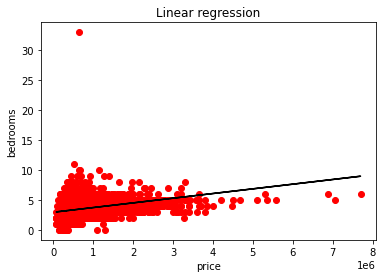

In [ ]:
x= dataframe["price"].values.reshape(-1,1)
y= dataframe["bedrooms"].values
poly = PolynomialFeatures(degree = 1) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("bedrooms")
plt.xlabel("price")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")  

In [ ]:
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 
print('R squared value of the model: {:.2f}'.format(lg.score(x_poly,y)*100))
print("that means 40.08% of values fit the regression model")

R squared value of the model: 9.51
that means 40.08% of values fit the regression model


Intercept:  1.290314886332505
Coefficient: [0.0000000e+00 3.7770519e-07]
equation of regression is :y= 1.29031 + 0.0000000e+00 + 3.7770519e-07*floors 


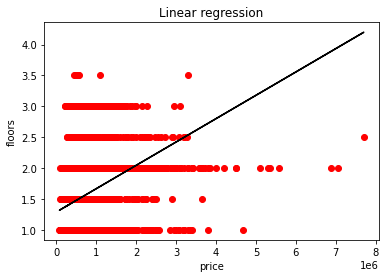

In [ ]:
x= dataframe["price"].values.reshape(-1,1)
y= dataframe["floors"].values
poly = PolynomialFeatures(degree = 1) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lgr=LinearRegression()
lgr.fit(x_poly, y) 
#Printing the model coefficients
print('Intercept: ', lgr.intercept_)
print('Coefficient:', lgr.coef_)
print("equation of regression is :y= 1.29031 + 0.0000000e+00 + 3.7770519e-07*floors ")
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("floors")
plt.xlabel("price")
plt.plot(x, lgr.predict(poly.fit_transform(x)), color="k")  

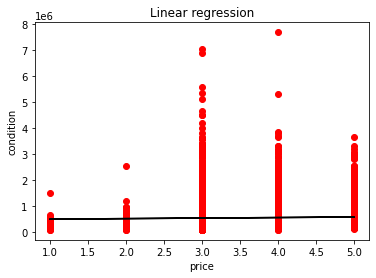

In [ ]:
x= dataframe["condition"].values.reshape(-1,1)
y= dataframe["price"].values
poly = PolynomialFeatures(degree = 1) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("condition")
plt.xlabel("price")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")  

# Multi-Linear Regression :
f1 :long is the size of the house.

f2 : bedrooms is bad rooms in the house.

f3 : waterfront is the locality of the house.

f4 :condition is the condition of the house and,

f5 : price is our output feature which is the price of the house.
** equation: Formula: Y = β0 + β1X1 + β2X2 + β3X3 + ... + βnXn + e**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# create matrix and vectors
x = dataframe[["bedrooms", "bathrooms","floors"]]
y = dataframe["price"]
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2)
##[1, x1, x2, x1^2, x1*x2, x2^2].
print(poly)
print("linear regression model")
#Setting the value for X and Y
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)
mlr= LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))
print('R squared value of the test model: {:.2f}'.format(mlr.score(x_test,y_test)*100))
print('R squared value of the train model: {:.2f}'.format(mlr.score(x_train,y_train)*100))

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')
linear regression model
-29430.761631020345
R squared value of the test model: 27.30
R squared value of the train model: 27.97


**R squared value of the model: 27.97 =>** that means that 27.97% of data fit the regression model

In [ ]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)

In [ ]:
#Setting the value for X and Y
x = dataframe[['bedrooms', 'bathrooms', 'waterfront','condition']]
y = dataframe['price']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)
mlr= LinearRegression()  
mlr.fit(x_train, y_train)
print(mlr.fit(x_train,y_train))
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))
#Printing the model coefficients => b
print("model coeff",mlr.coef_)
print("intercept coeff",mlr.intercept_)
##[1, x1, x2, x1^2, x1*x2, x2^2]. 
##Y=   24440.1*x +227736.84*x^2 +1042357.3*x^3 -31945.78 
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R squared value of the model: 34.14
model coeff [  19201.9382795   236990.05981074 1034765.56586108   56353.59790658]
intercept coeff -226087.68126121


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4, random_state=100)
mlr= LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))
# print the R-squared value for the model
print('R squared value of the test model: {:.2f}'.format(mlr.score(x_test,y_test)*100))
print('R squared value of the train model: {:.2f}'.format(mlr.score(x_train,y_train)*100))

-225266.16588950565
R squared value of the test model: 30.39
R squared value of the train model: 36.59


**R squared value of the model: 26.57 =>** that means that 26.57% of data fit the regression model

=> As a metter of facts, the more we add input values the more we get coef_ even the incercept coef will change.